## Number index, all models together

Time mean \
Annual \
Seasonal \
Montly mean \
Daily

In [8]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [26]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    # 'historical',
    'rcp85'
    ]
experiment = experiments[0]

### ROME

In [10]:
model = 'GFDL-CM3'
experiment = 'historical'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_numberIndex_' + experiment + '.nc'
path = folder + '/' + fileName
NumberIndex = xr.open_dataset(path)
NumberIndex

<xarray.Dataset>
Dimensions:   (time: 10950)
Coordinates:
  * time      (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    o_number  (time) float64 ...
    areaf     (time) float64 ...

In [27]:
numberIndex_options = [
    'o_number',
    # 'areaf'
    ]
numberIndex_option = numberIndex_options[0]

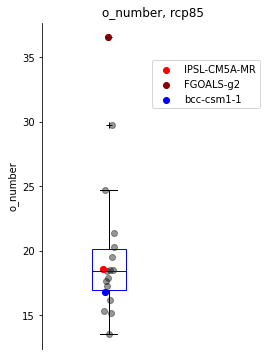

In [28]:
y= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_numberIndex_' + experiment + '.nc'
    path = folder + '/' + fileName
    numberIndex = xr.open_dataset(path)
    y = np.append(y, numberIndex[numberIndex_option].mean(dim='time'))

plt.figure(figsize=(4,6))
plt.xlim(0,1)
# plt.ylim(0.6e+6, 1.3e+6)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title(numberIndex_option + ', ' + experiment)
plt.ylabel(numberIndex_option)
plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

sns.despine(top=True, right=True, left=False, bottom=True)

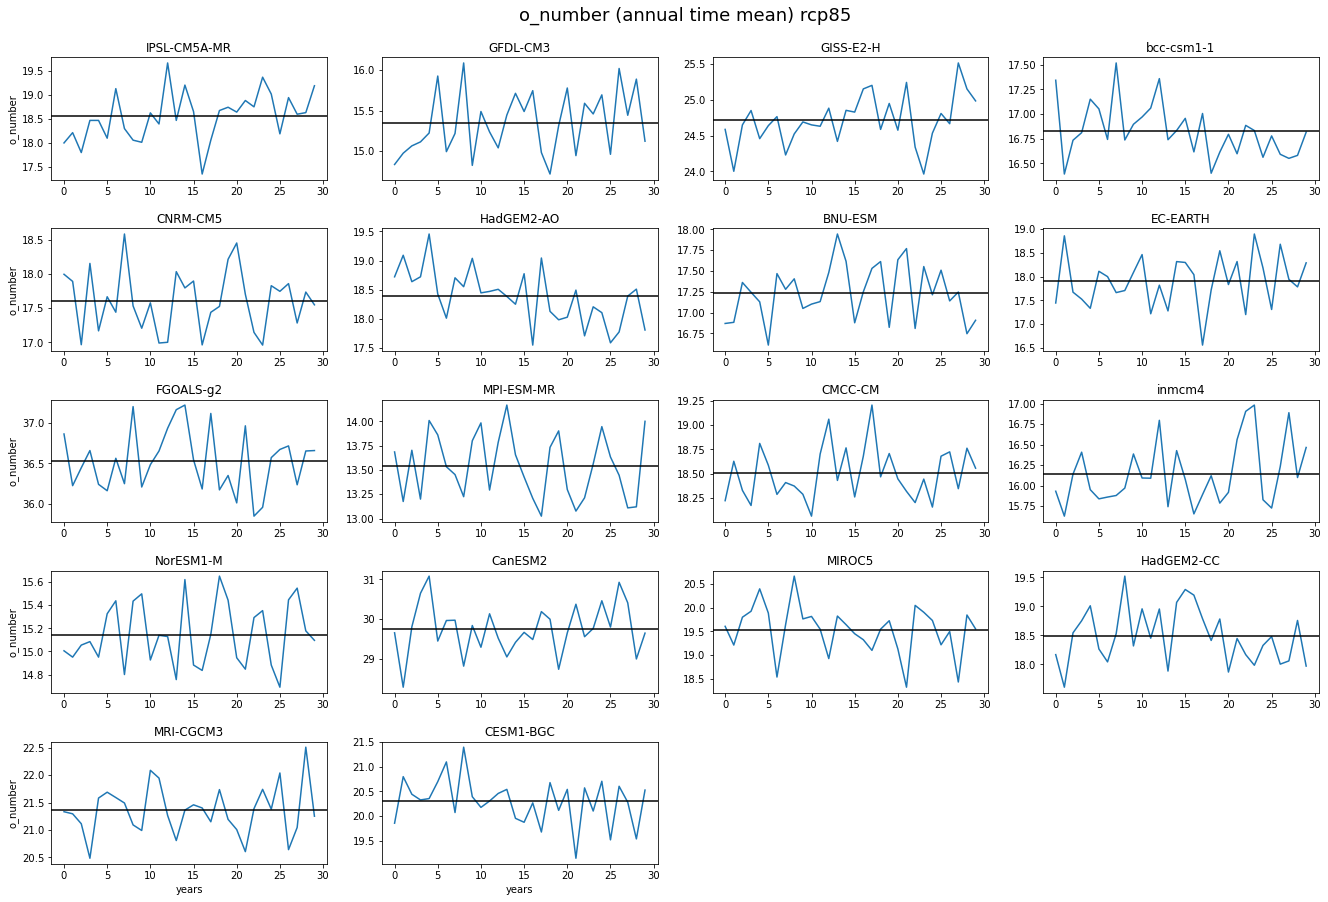

In [29]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(numberIndex_option + ' (annual time mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_numberIndex_' + experiment + '.nc'
    path = folder + '/' + fileName
    numberIndex = xr.open_dataset(path)

    ax.plot(numberIndex[numberIndex_option].resample(time='Y').mean(dim='time'))
    ax.axhline(y=numberIndex[numberIndex_option].resample(time='Y').mean(dim='time').mean(dim='time'), color='k')
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(numberIndex_option)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()


In [20]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

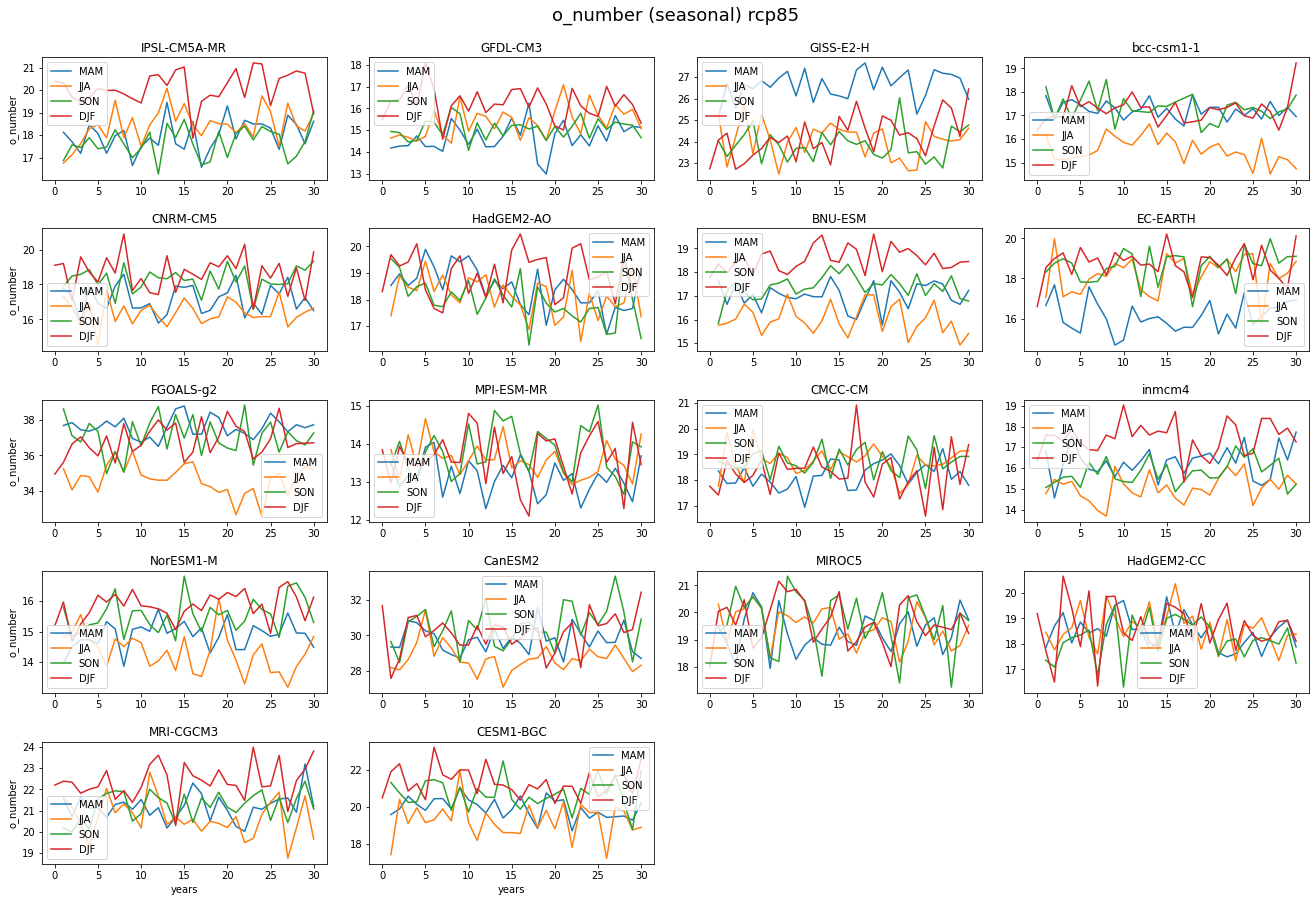

In [30]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(numberIndex_option + ' (seasonal) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_numberIndex_' + experiment + '.nc'
    path = folder + '/' + fileName
    numberIndex = xr.open_dataset(path)

    numberIndex_season = numberIndex[numberIndex_option].resample(time='QS-DEC').mean(dim="time")
    numberIndex_season = to_monthly(numberIndex_season)
    numberIndex_season = numberIndex_season.rename({'month':'season'})
    numberIndex_season = numberIndex_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

    ax.plot(numberIndex_season, label = numberIndex_season.season.values)
    ax.set_title(model)
    ax.legend()

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(numberIndex_option)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

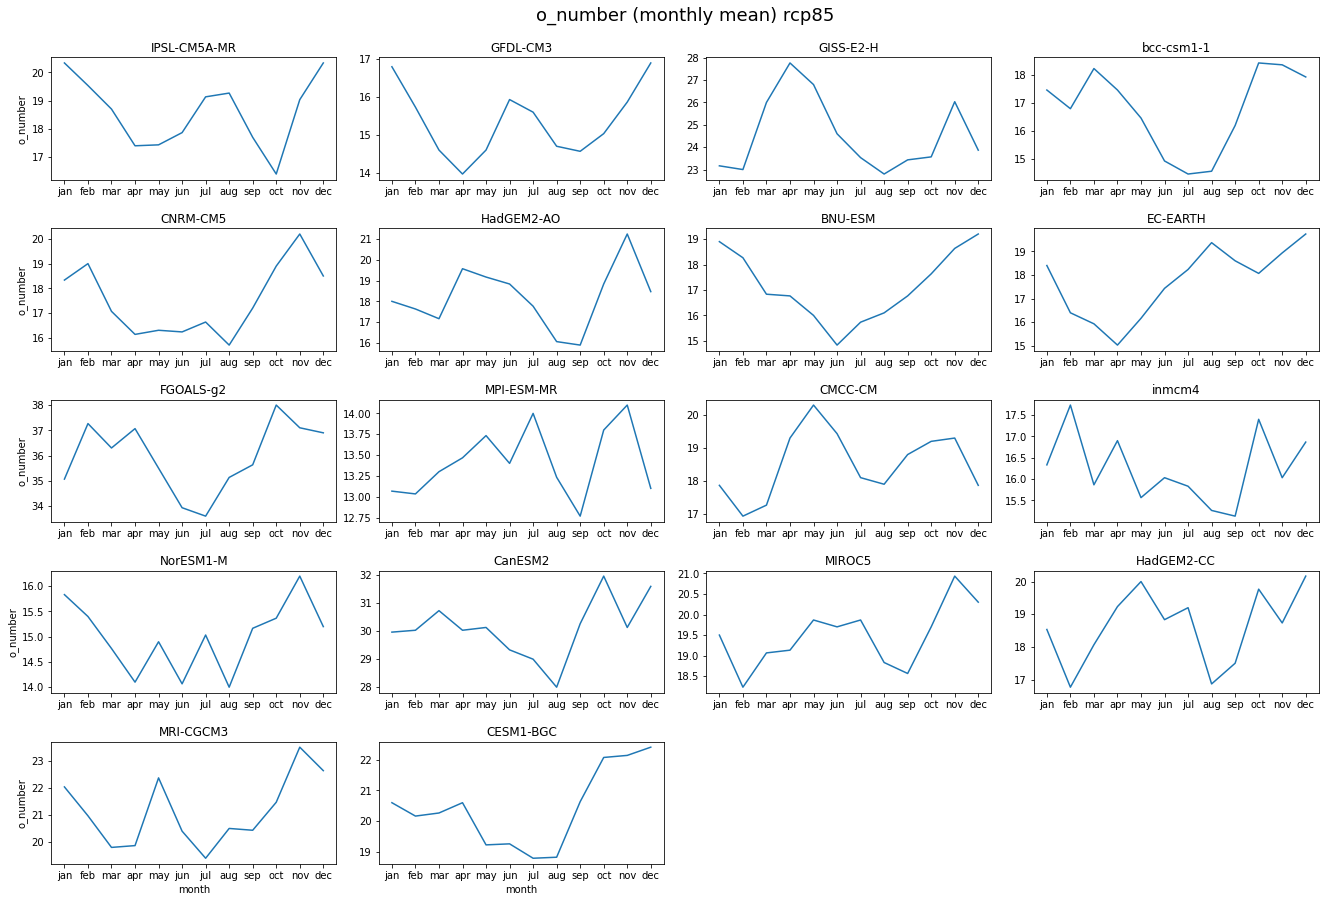

In [31]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(numberIndex_option + ' (monthly mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_numberIndex_' + experiment + '.nc'
    path = folder + '/' + fileName
    numberIndex= xr.open_dataset(path)

    numberIndex_monthly = to_monthly(numberIndex[numberIndex_option])
    numberIndex_monthly = numberIndex_monthly.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])

    ax.plot(numberIndex_monthly.mean(dim='year'))
    ax.set_title(model)
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(numberIndex_monthly.month.values)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('month')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(numberIndex_option)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

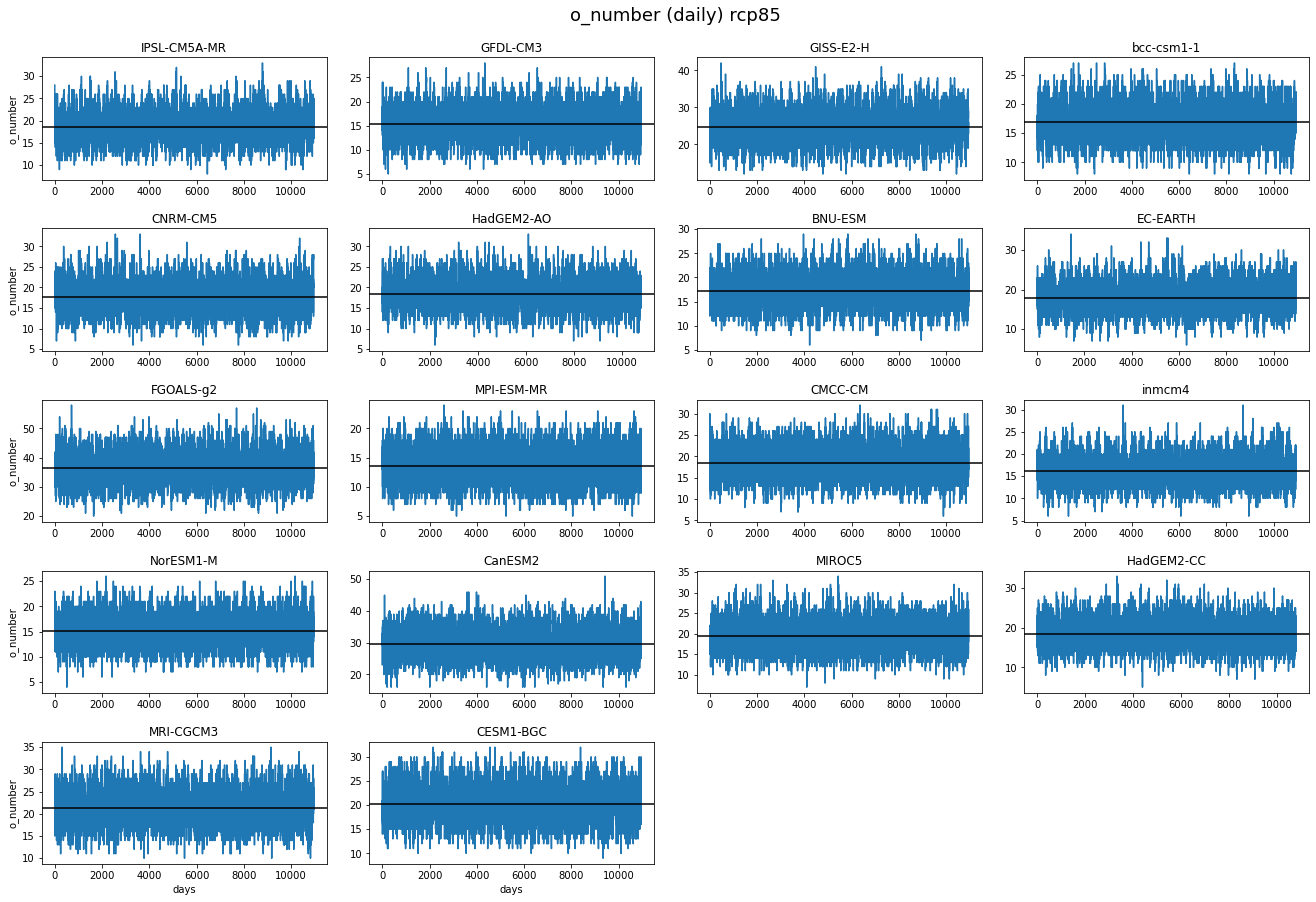

In [32]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle(numberIndex_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_numberIndex_' + experiment + '.nc'
    path = folder + '/' + fileName
    numberIndex = xr.open_dataset(path)

    ax.plot(numberIndex[numberIndex_option])
    ax.axhline(y=numberIndex[numberIndex_option].mean(dim='time'), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(numberIndex_option)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()